In [1]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

2022-11-14 18:26:19.232984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 18:26:19.552235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 18:26:19.552252: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 18:26:19.597849: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 18:26:20.445640: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [3]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_size"
for pool_size in [2, 3, 4, 5, 6]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(pool_size, pool_size), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(pool_size, pool_size), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_titles.append(pool_size)
    all_descriptions.append(get_layers_info(model_layers))
all_descriptions

2022-11-14 18:26:21.699636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-14 18:26:21.699886: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-14 18:26:21.699906: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-11-14 18:26:21.700376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (2, 2)  (1, 1),
 0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (3, 3)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (3, 3)  (1, 1),
 0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (4, 4)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D             

In [4]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [5]:
batch_size = 128
epochs = 10
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    all_history.append(history)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/10
422/422 [==============================] - 54s 127ms/step - loss: 0.1491 - accuracy: 0.9548 - val_loss: 0.0671 - val_accuracy: 0.9798
Epoch 2/10
422/422 [==============================] - 50s 118ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0513 - val_accuracy: 0.9858
Epoch 3/10
422/422 [==============================] - 50s 117ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0446 - val_accuracy: 0.9885
Epoch 4/10
422/422 [==============================] - 49s 116ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0397 - val_accuracy: 0.9897
Epoch 5/10
422/422 [==============================] - 48s 113ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0371 - val_accuracy: 0.9910
Epoch 6/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0373 - val_accuracy: 0.9920
Epoch 7/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0388 - val_ac

 20%|██        | 1/5 [08:07<32:30, 487.52s/it]

Epoch 1/10
422/422 [==============================] - 47s 110ms/step - loss: 0.1588 - accuracy: 0.9525 - val_loss: 0.0500 - val_accuracy: 0.9870
Epoch 2/10
422/422 [==============================] - 44s 105ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0371 - val_accuracy: 0.9887
Epoch 3/10
422/422 [==============================] - 35s 83ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0340 - val_accuracy: 0.9922
Epoch 4/10
422/422 [==============================] - 35s 84ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0366 - val_accuracy: 0.9903
Epoch 5/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 6/10
422/422 [==============================] - 36s 86ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0393 - val_accuracy: 0.9903
Epoch 7/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0381 - val_accurac

 40%|████      | 2/5 [14:30<21:18, 426.09s/it]

Epoch 1/10
422/422 [==============================] - 39s 91ms/step - loss: 0.1677 - accuracy: 0.9504 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 2/10
422/422 [==============================] - 38s 90ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 3/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 4/10
422/422 [==============================] - 37s 88ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0287 - val_accuracy: 0.9927
Epoch 5/10
422/422 [==============================] - 38s 90ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0359 - val_accuracy: 0.9903
Epoch 6/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 7/10
422/422 [==============================] - 37s 88ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0299 - val_accuracy:

 60%|██████    | 3/5 [20:44<13:24, 402.46s/it]

Epoch 1/10
422/422 [==============================] - 39s 93ms/step - loss: 0.2008 - accuracy: 0.9396 - val_loss: 0.0464 - val_accuracy: 0.9863
Epoch 2/10
422/422 [==============================] - 40s 95ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 3/10
422/422 [==============================] - 40s 95ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 4/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 5/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0288 - val_accuracy: 0.9910
Epoch 6/10
422/422 [==============================] - 40s 94ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0288 - val_accuracy: 0.9920
Epoch 7/10
422/422 [==============================] - 39s 92ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0302 - val_accuracy:

 80%|████████  | 4/5 [27:24<06:41, 401.23s/it]

Epoch 1/10
422/422 [==============================] - 41s 97ms/step - loss: 0.2669 - accuracy: 0.9196 - val_loss: 0.0655 - val_accuracy: 0.9795
Epoch 2/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 3/10
422/422 [==============================] - 42s 98ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0375 - val_accuracy: 0.9900
Epoch 4/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0433 - val_accuracy: 0.9887
Epoch 5/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 6/10
422/422 [==============================] - 43s 103ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 7/10
422/422 [==============================] - 44s 104ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0376 - val_accur

100%|██████████| 5/5 [34:35<00:00, 415.05s/it]


In [6]:
# score = model.evaluate(x_test, y_test, verbose=0)

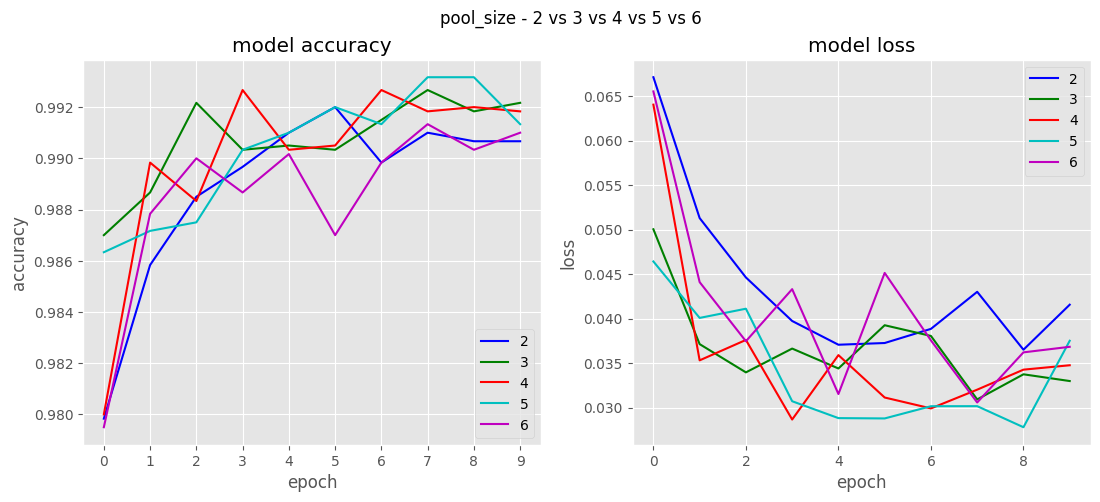

In [7]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)